In [2]:
import nltk
from nltk import sent_tokenize
import re 

file0 = nltk.corpus.gutenberg.fileids()[7]
print(file0)

carroll-alice.txt


In [3]:
alicetext = nltk.corpus.gutenberg.raw(file0)
len(alicetext)

144395

In [4]:
textsplit = nltk.sent_tokenize(alicetext)
print(textsplit[:10])

["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.", "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'", 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.', "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!", 'Oh dear!', "I shall be late!'", '(when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\n

In [5]:
# Apply the word tokenizer to each sentence
lowertext = [w.lower() for w in textsplit]

In [6]:
## NON-ALPHA FILTER
pattern = re.compile('^[^a-z]+$')
nonAlphaMatch = pattern.match('**')
#  if it matched, print a message
if nonAlphaMatch:
    print ('matched non-alphabetical')

matched non-alphabetical


In [7]:
# function
def alpha_filter(w):
  # pattern to match word of non-alphabetical characters
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [8]:
# apply the function
alphaalicewords = [w for w in lowertext if not alpha_filter(w)]
print(alphaalicewords[:10])
print(len(alphaalicewords))

["[alice's adventures in wonderland by lewis carroll 1865]\n\nchapter i.", "down the rabbit-hole\n\nalice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought alice 'without pictures or\nconversation?'", 'so she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a white rabbit with pink eyes ran\nclose by her.', "there was nothing so very remarkable in that; nor did alice think it so\nvery much out of the way to hear the rabbit say to itself, 'oh dear!", 'oh dear!', "i shall be late!'", '(when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\n

In [9]:
# Apply the word tokenizer to each sentence
tokentext = [nltk.word_tokenize(sent) for sent in alphaalicewords]
#print(tokentext[:2])
#the output is a list of strings that contains the sentences
type(tokentext)
#len(tokentext)

list

In [9]:
## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags

# use the Stanford POS tagger to POS tag tokens of each sentence
# this is the default tagger in nltk
taggedtext = [nltk.pos_tag(tokens) for tokens in tokentext]
print(taggedtext[:2])

[[('[', 'JJ'), ('alice', 'NN'), ("'s", 'POS'), ('adventures', 'NNS'), ('in', 'IN'), ('wonderland', 'NN'), ('by', 'IN'), ('lewis', 'NN'), ('carroll', 'NN'), ('1865', 'CD'), (']', 'NNP'), ('chapter', 'NN'), ('i', 'NN'), ('.', '.')], [('down', 'IN'), ('the', 'DT'), ('rabbit-hole', 'JJ'), ('alice', 'NN'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), (',', ','), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), (':', ':'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), (',', ','), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'NNS'), (

In [10]:
# Following our NLTK textbook, chapter on Information Extraction--Chunking (https://www.nltk.org/book/ch07.html)

# Using CHUNKING to parse sentences 
# to look for "adjective phrases", i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
# First step: writing a grammar that defines the POS in the chunk
# we name this grammar "ADJPH" ("ADJective PHrase") using regexes 

import re
grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}"
# This regex reads as: "find groups ("< >") of RBs (adverbs) together with groups of JJs (adjectives), with groups defineds as
# RBs with any ending (the "." is a placeholder or wildcard for the "R" and the "S" at the end of RBR and RBS, 
# while "?" indicates "optional character" so RB can be found alone as well). Same regex operators apply to JJs.
# Feel free to edit the regex in this grammar, or come up with your own.

# Second step: import the nltk parser to process each sentence
chunk_parser_adj = nltk.RegexpParser(grammar_adjph)

adjph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                adjph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
adjective_phrases = []
for sent in adjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adjective_phrases.append(temp)
    
print('First 10 adjective phrases: ', adjective_phrases[:10])


# Following our NLTK textbook, chapter 1 on Language Processing (https://www.nltk.org/book/ch01.html)

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
freq_adjph = nltk.FreqDist(adjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in freq_adjph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(adjph_tags))


First 10 adjective phrases:  ['very tired ', 'very sleepy ', 'so very remarkable ', 'so very much ', 'quite natural ', 'very deep ', 'very deep ', 'too dark ', 'very likely ', 'very good ']
Top adjective phrases by frequency: 
so much  8
very curious  6
very glad  5
very much  4
very little  4
very likely  3
very good  3
so many  3
only wish  3
too much  3
once more  3
very tired  2
quite natural  2
very deep  2
n't much  2
very few  2
as much  2
so grave  2
always ready  2
very uncomfortable  2
almost wish  2
very short  2
very difficult  2
quite as much  2
quite silent  2
certainly too much  2
not much  2
so large  2
n't very civil  2
very interesting  2
very sleepy  1
so very remarkable  1
so very much  1
too dark  1
rather glad  1
no longer  1
too large  1
too small  1
not much larger  1
really impossible  1
almost certain  1
very nice  1
now only ten  1
too slippery  1
very fond  1
very small  1
quite surprised  1
quite dull  1
now more  1
so desperate  1
Length of adjective phras

In [11]:
type(adjective_phrases)

list

In [12]:
import pandas as pd

#freq_adjph
df_fadj = pd.DataFrame.from_dict(freq_adjph, orient='index')
df_fadj.columns = ['freq']
df_fadj.index.name = 'adj'
print(df_fadj)

#df = pd.DataFrame(freq_adjph, columns = ['word','freq'])
#print(df)

                     freq
adj                      
very tired              2
very sleepy             1
so very remarkable      1
so very much            1
quite natural           2
...                   ...
near enough             1
n't usual               1
really clever           1
most important          1
alice dear              1

[183 rows x 1 columns]


In [13]:
df_fadj['freq'].value_counts()

1    153
2     19
3      6
4      2
8      1
5      1
6      1
Name: freq, dtype: int64

<AxesSubplot:>

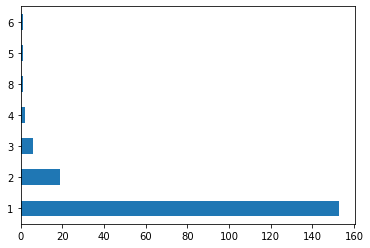

In [14]:
import matplotlib.pyplot as plt
import numpy as np

freqfreq = df_fadj['freq'].value_counts()

freqfreq.plot.barh()

In [15]:
# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB')
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
# Again, feel free to edit the regex in this grammar, or come up with your own!
grammar_advph = "ADVPH: {<RB>+<RB>}"

# Second step: import the nltk parser to process each sentence
chunk_parser_adv = nltk.RegexpParser(grammar_advph)

advph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                advph_tags.append(subtree)
                
# Visualizing the actual adjective phrase
adverb_phrases = []
for sent in advph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adverb_phrases.append(temp)
    
print('First 10 adverb phrases: ', adverb_phrases[:10])

# top 50 adjective phrases
freq_advph = nltk.FreqDist(adverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in freq_advph.most_common(50):
    print(word, freq)

            
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(advph_tags))

First 10 adverb phrases:  ['as well ', 'so very ', 'so very ', 'never before ', 'never once ', 'suddenly down ', 'very slowly ', 'alice soon ', 'down here ', 'here alice ']
Top adverb phrases by frequency: 
as well  15
very soon  7
as soon  6
very politely  5
so very  4
down here  4
very much  4
just as well  4
very well  3
so far  3
too far  3
just then  3
back again  3
well enough  3
down again  3
very carefully  3
so often  3
not quite  3
very nearly  3
n't quite  3
as long  3
just now  3
very slowly  2
alice soon  2
very earnestly  2
not even  2
so alice  2
as hard  2
rather not  2
very gravely  2
very humbly  2
very angrily  2
so easily  2
quite as  2
certainly too  2
rather timidly  2
'all right  2
n't very  2
'exactly so  2
asleep again  2
never even  2
alice cautiously  2
n't even  2
never before  1
never once  1
suddenly down  1
here alice  1
not much  1
not here before  1
too long  1
Length of adverb phrase sentences:  253


In [16]:
#freq_advph
df_fadv = pd.DataFrame.from_dict(freq_advph, orient='index')
df_fadv.columns = ['freq']
df_fadv.index.name = 'adv'
print(df_fadv)

                freq
adv                 
as well           15
so very            4
never before       1
never once         1
suddenly down      1
...              ...
then again         1
now hastily        1
still just         1
once again         1
perhaps even       1

[163 rows x 1 columns]


<AxesSubplot:>

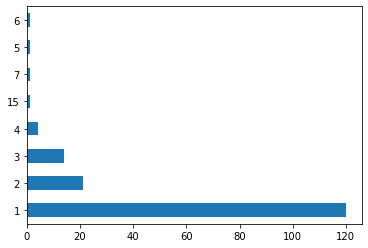

In [17]:
freqfreq2 = df_fadv['freq'].value_counts()

freqfreq2.plot.barh()

In [18]:
# Top 50 adjective tokens

adjective_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['JJ', 'JJR', 'JJS']: # adjective, comparative, superlative (can you think of another way to write this regex?...)
            if len(word)>1:
                adjective_tokens.append(word)
freq_adjective = nltk.FreqDist(adjective_tokens)

for word, freq in freq_adjective.most_common(50):
    print(word,freq)

little 127
other 40
great 39
much 34
large 33
more 33
last 33
first 32
white 30
such 27
poor 26
thought 24
good 24
long 24
same 23
next 20
curious 19
sure 19
old 19
right 18
low 14
high 14
alice 14
mad 14
whole 13
many 12
best 11
beautiful 11
own 10
glad 10
small 10
few 9
different 9
dear 9
least 9
afraid 8
ready 8
oh 7
golden 7
larger 7
wish 7
enough 7
deep 6
nice 6
dry 6
bright 6
melancholy 6
offended 6
full 6
sharp 6


In [19]:
# Top 50 adverb tokens

adverb_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative (again, you can look for ways to write this better!)
            if len(word)>1:
                adverb_tokens.append(word)
freq_adverb = nltk.FreqDist(adverb_tokens)

for word, freq in freq_adverb.most_common(50):
    print(word,freq)

n't 204
very 139
not 135
so 110
again 83
then 82
quite 52
now 50
alice 49
just 49
as 48
here 48
never 45
only 42
down 38
once 32
back 32
well 30
too 26
up 26
rather 25
soon 25
away 23
yet 22
ever 21
even 19
however 19
first 18
much 17
indeed 16
more 16
there 15
perhaps 14
anxiously 14
hastily 14
suddenly 13
still 13
certainly 13
far 13
always 13
hardly 12
about 12
else 11
enough 11
really 10
nearly 10
angrily 9
together 9
timidly 9
close 8


In [20]:
## TO DO / YOUR TURN NOW!
## NOUN EXTRACTION
## VERB EXTRACTION
## REMEMBER TO CHECK THE PENN POS TAGS LIST: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
## TO FIND ALL TAGS

In [21]:
# Top 50 noun tokens

noun_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['NN', 'NNS', 'NNP', 'NNPS']: #noun, noun plural, proper noun sing, proper noun pl
            if len(word)>1:
                noun_tokens.append(word)
freq_noun = nltk.FreqDist(noun_tokens)

for word, freq in freq_noun.most_common(50):
    print(word,freq)

alice 308
queen 71
time 68
king 61
hatter 56
mock 56
turtle 55
gryphon 54
way 53
head 50
thing 49
voice 48
rabbit 47
duchess 42
mouse 41
tone 40
dormouse 38
'it 37
cat 35
march 34
moment 31
hare 31
nothing 30
things 30
door 30
eyes 28
'you 27
day 25
course 25
caterpillar 25
round 23
words 21
minute 21
sort 20
feet 19
anything 19
hand 19
dear 18
house 18
table 18
something 18
soup 18
court 18
use 17
question 17
side 17
jury 17
bill 17
garden 16
end 15


In [22]:
# Top 50 verb tokens

verb_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']: #verb, past, present, past p, sing present, 3rd person sing
            if len(word)>1:
                verb_tokens.append(word)
freq_verb = nltk.FreqDist(verb_tokens)

for word, freq in freq_verb.most_common(50):
    print(word,freq)

said 462
was 366
had 184
be 148
do 124
is 113
's 109
know 88
were 86
have 84
went 83
did 74
see 67
began 58
'm 56
think 51
say 51
are 47
go 47
thought 46
looked 45
got 45
get 44
came 40
've 39
herself 38
been 38
're 36
made 30
found 30
put 30
looking 30
come 29
tell 28
replied 28
seemed 27
going 27
make 27
took 24
heard 24
alice 24
felt 23
added 23
getting 22
find 21
does 21
take 20
like 20
tried 19
being 19


In [23]:
print('Length of adjective phrase sentences: ', len(adjph_tags))
print('Length of adverb phrase sentences: ', len(advph_tags))
print('Length of adjectives: ', len(adjective_tokens))
print('Length of adverbs: ', len(adverb_tokens))
print('Length of nouns: ', len(noun_tokens))
print('Length of verbs: ', len(verb_tokens))

Length of adjective phrase sentences:  236
Length of adverb phrase sentences:  253
Length of adjectives:  1587
Length of adverbs:  2213
Length of nouns:  4992
Length of verbs:  5673


In [24]:
# Now we have two lists of POS tags combinations we can compare
# We need to get the sentences back from the tagging exercise and run some stats

# Create a list of original sentences from the ADJECTIVE phrase subset:
adjph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in adjph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        adjph_whole_sentences.append(temp)
        
print(len(adjph_whole_sentences))

493


In [25]:
# Create a list of original sentences from the ADVERB phrase subset:
advph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in advph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        advph_whole_sentences.append(temp)
        
print(len(advph_whole_sentences))

521


In [26]:
# OPTIONAL STEP: Combine lists together to have a single list of adjective/adverb phrases:
# Useful to know which sentences are heavy in qualifiers

# create a new variable to store all adjective phrase sentences
adv_adj_phrase_sentences = adjph_whole_sentences

# iterate over adverb phrase sentences
for sent in advph_whole_sentences:
    # if a sentence is not in the adjective phrases list imported
    if sent not in adv_adj_phrase_sentences:
        # attach that sentence
        adv_adj_phrase_sentences.append(sent)

# print the lenght of the list (i.e. number of sentences with both adjective and adverb phrases)
print(len(adv_adj_phrase_sentences))


671


In [27]:
# Following our NLTK textbook, Writing Structural Programs chapter
# section on Procedural vs Declarative style (http://www.nltk.org/book_1ed/ch04.html) 

## CORPUS STATISTICS--SENTENCES LENGTH

# Calculating the average length of sentences in the entire corpus
# from http://www.nltk.org/book_1ed/ch04.html
total_corpus = sum(len(sent) for sent in textsplit) # remember: 'textsplit' is our text split into sentences
print(total_corpus / len(textsplit))

87.26892307692307


In [28]:
# Calculate the average length of an adjective phrase sentence
# We can then compare the average length of the adjective phrases to 
# the average sentences we calculated for all sentences in the corpus
total_adjph_sentences = sum(len(sent) for sent in adjph_whole_sentences) # adjph_whole_sentences stores our adjective phrases
print(total_adjph_sentences / len(adjph_whole_sentences))

9.30849478390462
